## Libraries

In [2]:
import pandas as pd
import plotly.express as px

## Data

In [3]:
longTable = pd.read_csv("../data/exergamelf2.csv")
longTable

,idrow,Age,Decade,iSubj,trial,myVars,value,normVal,older
0,0,20,2,21,1,medLrms51,0.294961,0.879737,False
1,1,20,2,21,2,medLrms51,0.308855,0.926365,False
2,2,20,2,21,3,medLrms51,0.285579,0.848253,False
3,3,20,2,21,4,medLrms51,0.264111,0.776211,False
4,4,20,2,21,5,medLrms51,0.308285,0.924452,False
...,...,...,...,...,...,...,...,...,...
4395,395,79,7,13,6,medLsdD51,0.151711,0.865573,True
4396,396,79,7,13,7,medLsdD51,0.119087,0.617591,True
4397,397,79,7,13,8,medLsdD51,0.086589,0.370559,True
4398,398,79,7,13,9,medLsdD51,0.138026,0.761551,True


## Long to wide format

In [20]:
# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
wideTable=longTable.pivot_table(index=['idrow','iSubj','trial','Age','Decade','older'], 
                                columns='myVars', values='normVal')
wideTable
# There is something strange

,,,,,myVars,meanK,medK,medLcov51,medLcovD51,medLrms51,medLrmslD51,medLsd51,medLsdD51,medSpeed,medTI51,medTIms51
idrow,iSubj,trial,Age,Decade,older,,,,,,,,,,,
0,21,1,20,2,False,0.249439,0.386508,0.075412,0.072835,0.879737,0.519743,0.108320,0.281748,0.517503,0.226381,0.424851
1,21,2,20,2,False,0.241150,0.402208,0.042119,0.048815,0.926365,0.528670,0.065745,0.188504,0.525880,0.228718,0.395246
2,21,3,20,2,False,0.306156,0.421924,0.055220,0.056356,0.848253,0.503551,0.074529,0.199264,0.475989,0.223225,0.444032
3,21,4,20,2,False,0.314906,0.472125,0.038657,0.045127,0.776211,0.465395,0.051955,0.145766,0.465425,0.194270,0.426941
4,21,5,20,2,False,0.331758,0.370969,0.216154,0.154394,0.924452,0.438028,0.337185,0.668837,0.508494,0.397554,0.318719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,13,6,79,7,True,0.462433,0.310683,0.487390,0.534489,0.420993,0.319932,0.320356,0.865573,0.236963,0.075700,0.562622
396,13,7,79,7,True,0.614123,0.593777,0.298158,0.306034,0.595596,0.376401,0.244837,0.617591,0.162618,0.319512,0.570391
397,13,8,79,7,True,0.689066,0.607419,0.096133,0.152150,0.603868,0.555657,0.090200,0.370559,0.110850,0.171225,0.635001


In [21]:
# Reset the index
wideTable = wideTable.reset_index()
wideTable

myVars,idrow,iSubj,trial,Age,Decade,older,meanK,medK,medLcov51,medLcovD51,medLrms51,medLrmslD51,medLsd51,medLsdD51,medSpeed,medTI51,medTIms51
0,0,21,1,20,2,False,0.249439,0.386508,0.075412,0.072835,0.879737,0.519743,0.108320,0.281748,0.517503,0.226381,0.424851
1,1,21,2,20,2,False,0.241150,0.402208,0.042119,0.048815,0.926365,0.528670,0.065745,0.188504,0.525880,0.228718,0.395246
2,2,21,3,20,2,False,0.306156,0.421924,0.055220,0.056356,0.848253,0.503551,0.074529,0.199264,0.475989,0.223225,0.444032
3,3,21,4,20,2,False,0.314906,0.472125,0.038657,0.045127,0.776211,0.465395,0.051955,0.145766,0.465425,0.194270,0.426941
4,4,21,5,20,2,False,0.331758,0.370969,0.216154,0.154394,0.924452,0.438028,0.337185,0.668837,0.508494,0.397554,0.318719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,13,6,79,7,True,0.462433,0.310683,0.487390,0.534489,0.420993,0.319932,0.320356,0.865573,0.236963,0.075700,0.562622
396,396,13,7,79,7,True,0.614123,0.593777,0.298158,0.306034,0.595596,0.376401,0.244837,0.617591,0.162618,0.319512,0.570391
397,397,13,8,79,7,True,0.689066,0.607419,0.096133,0.152150,0.603868,0.555657,0.090200,0.370559,0.110850,0.171225,0.635001
398,398,13,9,79,7,True,0.559573,0.640555,0.403544,0.546359,0.361771,0.290451,0.201352,0.761551,0.180877,0.183091,0.678713


## Plot

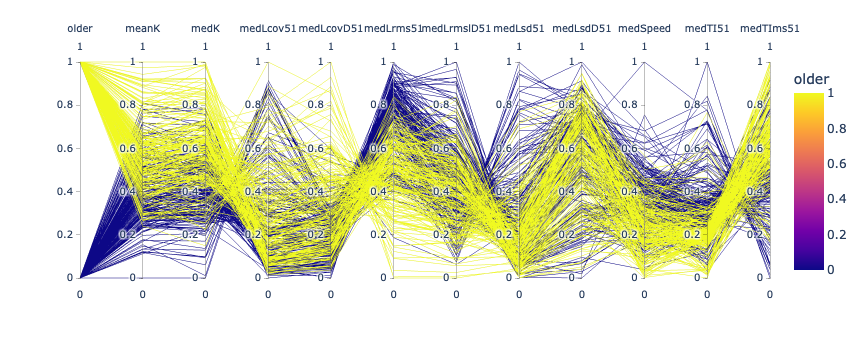

In [23]:
# https://plotly.com/python/colorscales/
wideTable["older"] = wideTable["older"].astype(int)
fig = px.parallel_coordinates(wideTable[wideTable.columns[5:]],color='older')
# fig.update_layout(autosize=False,width=800,height=400)
fig.show()  

## Let's try R

In [24]:
# activate R magic
%load_ext rpy2.ipython

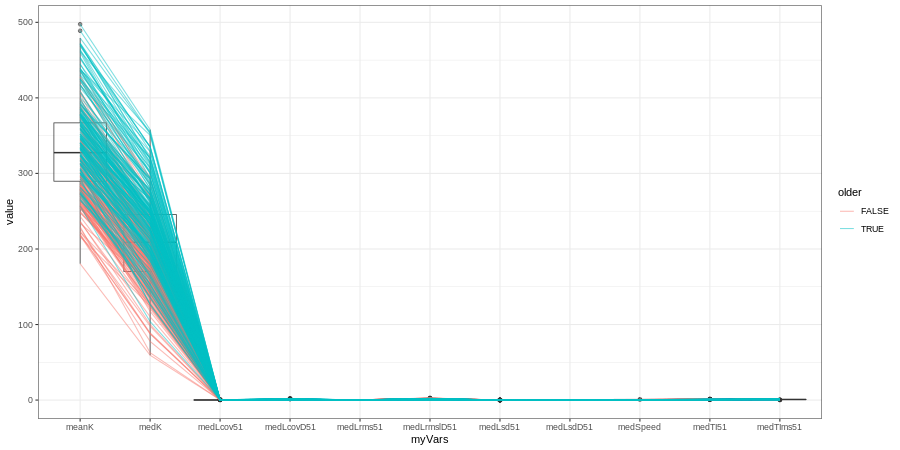

In [42]:
%%R -i longTable -w 900 -h 450 -u px
library(ggplot2)

# normalization problem, use 'normVal' instead of 'value'
parPlot <- ggplot(data=longTable,aes(x=myVars,y=value)) +
    geom_boxplot(size=0.35,alpha=0.5)+
    geom_line(aes(group=idrow,colour=older),alpha=0.5) +
    theme_bw()

parPlot